In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import PIL
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-03-31 05:51:29.331159: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 05:51:29.331287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 05:51:29.481378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


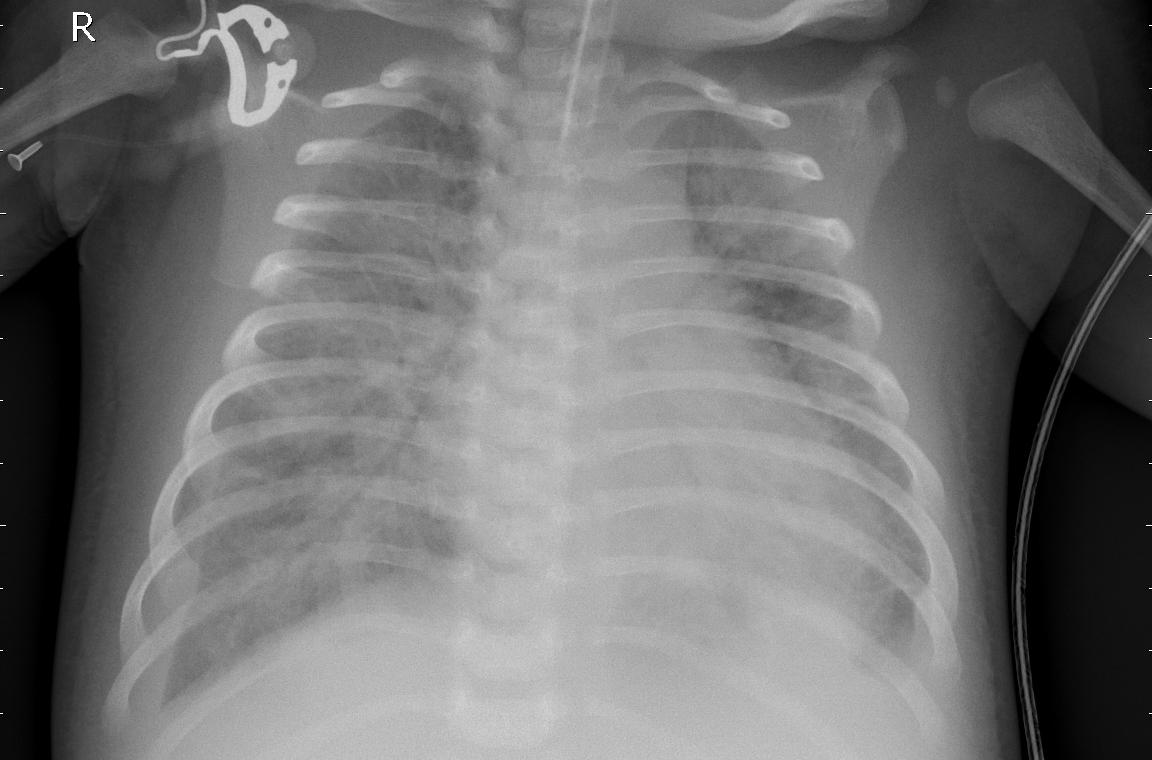

In [3]:
image = PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
image

In [ ]:
image_normal = PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0117-0001.jpeg')
image_normal

In [8]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
training_generator = ImageDataGenerator(rescale = 1/255)
train_data = training_generator.flow_from_directory(train_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [9]:
valid_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
validation_generator = ImageDataGenerator(rescale = 1/255)
valid_data = validation_generator.flow_from_directory(valid_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 16 images belonging to 2 classes.


In [10]:
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
testing_generator = ImageDataGenerator(rescale = 1/255)
test_data = testing_generator.flow_from_directory(test_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 624 images belonging to 2 classes.


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()
Model: "sequential"

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,700,161 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.evaluate(test_data)

78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - acc: 0.8675 - loss: 0.3109


[0.3212270736694336, 0.8717948794364929]

In [ ]:
predictions = model.predict(test_data)

52/78 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


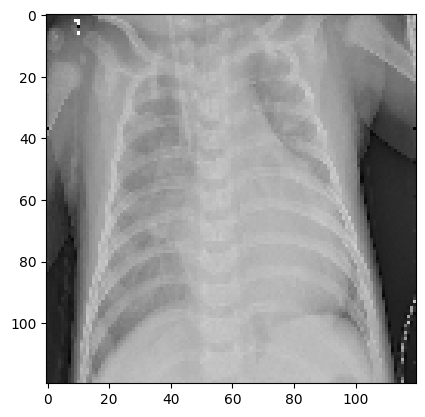

The probability of Pneumonia is:  [0.9969397]


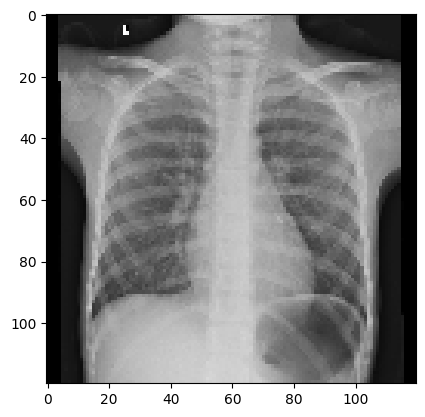

The probability of Pneumonia is:  [0.00336162]


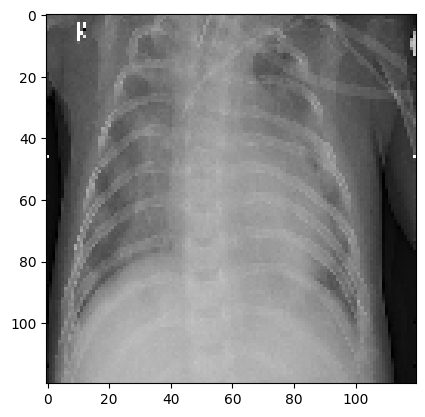

The probability of Pneumonia is:  [0.9983841]


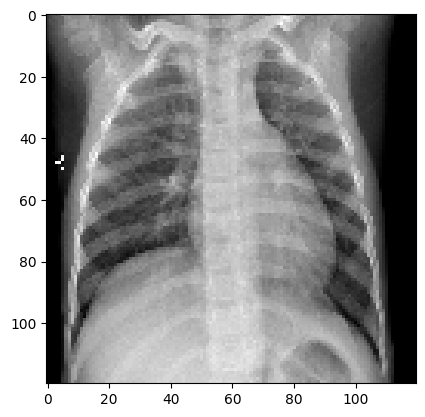

The probability of Pneumonia is:  [0.1611272]


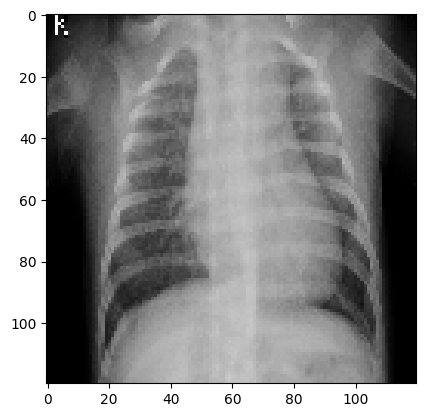

The probability of Pneumonia is:  [0.99952143]


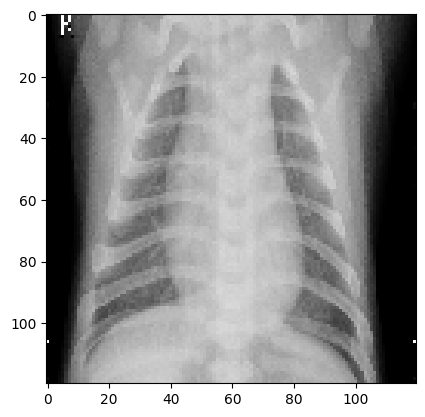

The probability of Pneumonia is:  [0.99995524]


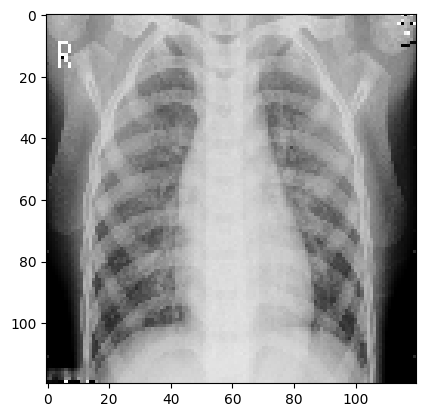

The probability of Pneumonia is:  [0.5768039]


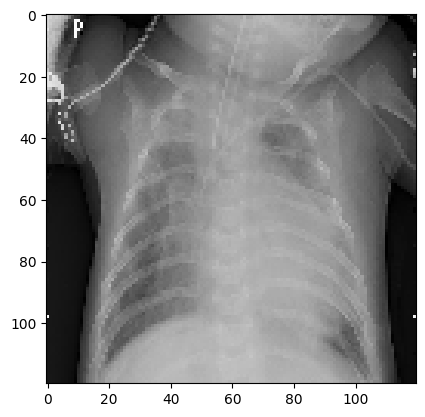

The probability of Pneumonia is:  [0.9997757]


In [19]:
batch_size = test_data.batch_size
num_batches = 1

for i in range(num_batches):
    x, y = next(test_data)
    predictions = model.predict(x)
    
    for j in range(min(batch_size, 8)):
        image = x[j]
        plt.imshow(image)
        plt.show()
        print('The probability of Pneumonia is: ', predictions[j])